# covid data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('covid_csv')
df.head(10)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
5,2020-01-22,Antigua and Barbuda,0,0,0
6,2020-01-22,Argentina,0,0,0
7,2020-01-22,Armenia,0,0,0
8,2020-01-22,Australia,0,0,0
9,2020-01-22,Austria,0,0,0


In [3]:
df.shape

(23688, 5)

In [4]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [6]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [7]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

describing null values in graphical representation

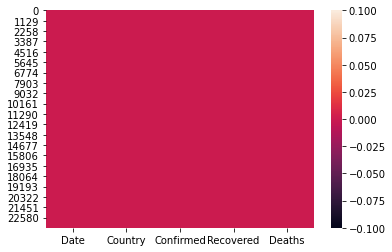

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


# correaltions

In [10]:
dfcor=df.corr()
dfcor

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


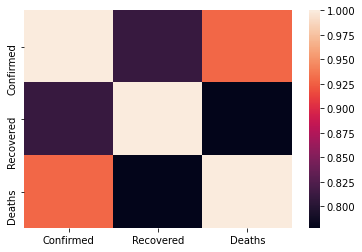

In [11]:
sns.heatmap(dfcor)

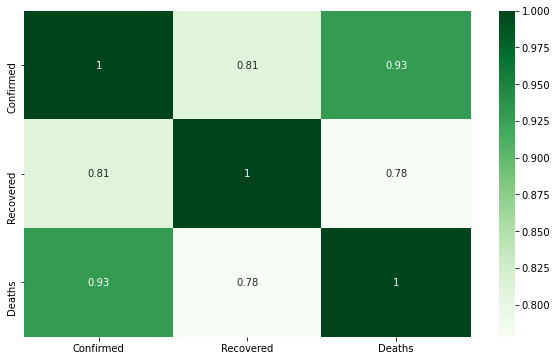

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Greens',annot=True)

# EDA process

In [59]:
import matplotlib.pyplot as plt


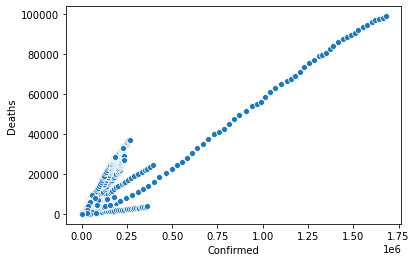

In [14]:
sns.scatterplot(x='Confirmed',y='Deaths',data=df)

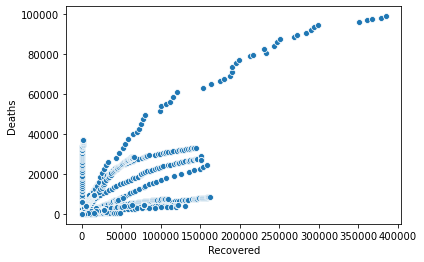

In [15]:
sns.scatterplot(x=	'Recovered',y='Deaths',data=df)

# checking outliers

In [16]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [18]:

df.iloc[:,0] = labelencoder.fit_transform(df.iloc[:,0].values)
                                        
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)

In [19]:
df.dtypes

Date         int32
Country      int32
Confirmed    int64
Recovered    int64
Deaths       int64
dtype: object

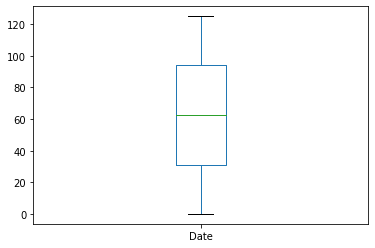

In [20]:
df['Date'].plot.box()

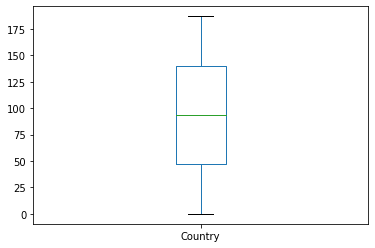

In [21]:
df['Country'].plot.box()

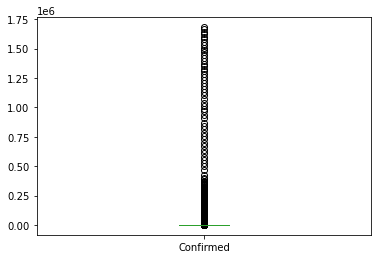

In [22]:
df['Confirmed'].plot.box()

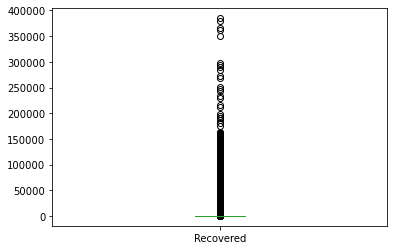

In [23]:
df['Recovered'].plot.box()

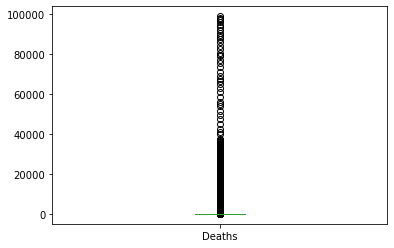

In [24]:
df['Deaths'].plot.box()

# skewness

In [25]:
df.skew().any

<bound method Series.any of Date          0.000000
Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64>

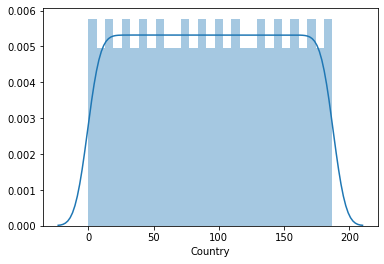

In [26]:
sns.distplot(df['Country'])
plt.show()

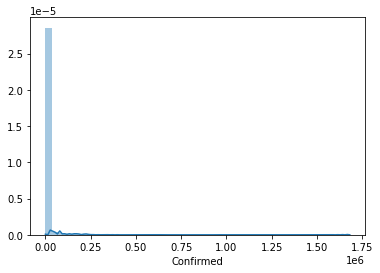

In [27]:
sns.distplot(df['Confirmed'])
plt.show()

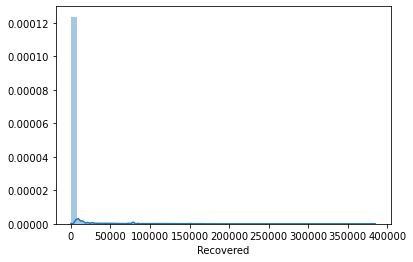

In [28]:
sns.distplot(df['Recovered'])
plt.show()

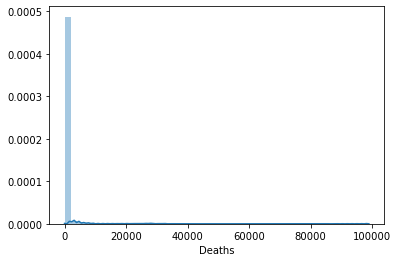

In [29]:
sns.distplot(df['Deaths'])
plt.show()

# z-score technique

In [30]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(23688, 5)

In [31]:
# threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [32]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(23688, 5)
(23177, 5)


# percentage loss

In [33]:
loss_percent=(23688-23177)/23688*100
print(loss_percent)

2.157210401891253


In [37]:
from sklearn.preprocessing import StandardScaler



In [43]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# model buliding

In [44]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


best_rstate=0
accu=0
for i in range(0,400):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"best accuracy {accu*100}found on random_state {best_rstate}")

best accuracy 63.279222511025004found on random_state 80


In [45]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=80)

# finding the best model

In [46]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=63.724701505622086, Cross_val_score = 55.15113302444563 $ difference = 8.573568481176459


In [47]:
#randomo forestregressor
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=96.77467629391226, Cross_val_score = 94.24726499575002 $ difference = 2.5274112981622494


In [48]:
#adaBoostRegessor
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=76.6856255291948, Cross_val_score = 75.0899347449929 $ difference = 1.5956907842018921


In [49]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=-1.0387864523713011e+30, Cross_val_score = -4.953382040888084e+30 $ difference = 3.914595588516783e+30
